### PCA
###### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\PCA\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [10]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.shape

(178, 14)

In [16]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

2.	Examine the distribution of features using histograms, box plots, or density plots.


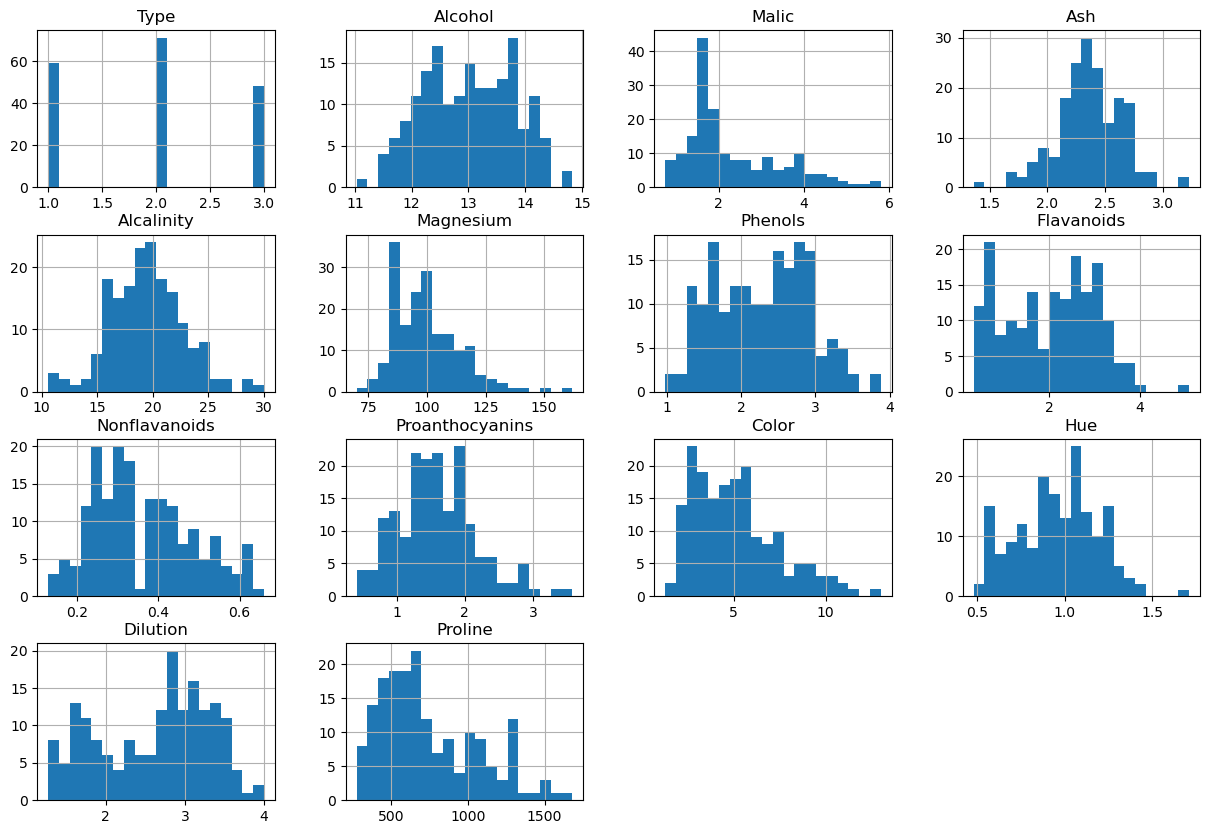

In [33]:
#histogram for each feature
df.hist(bins=20,figsize=(15,10))
plt.show()

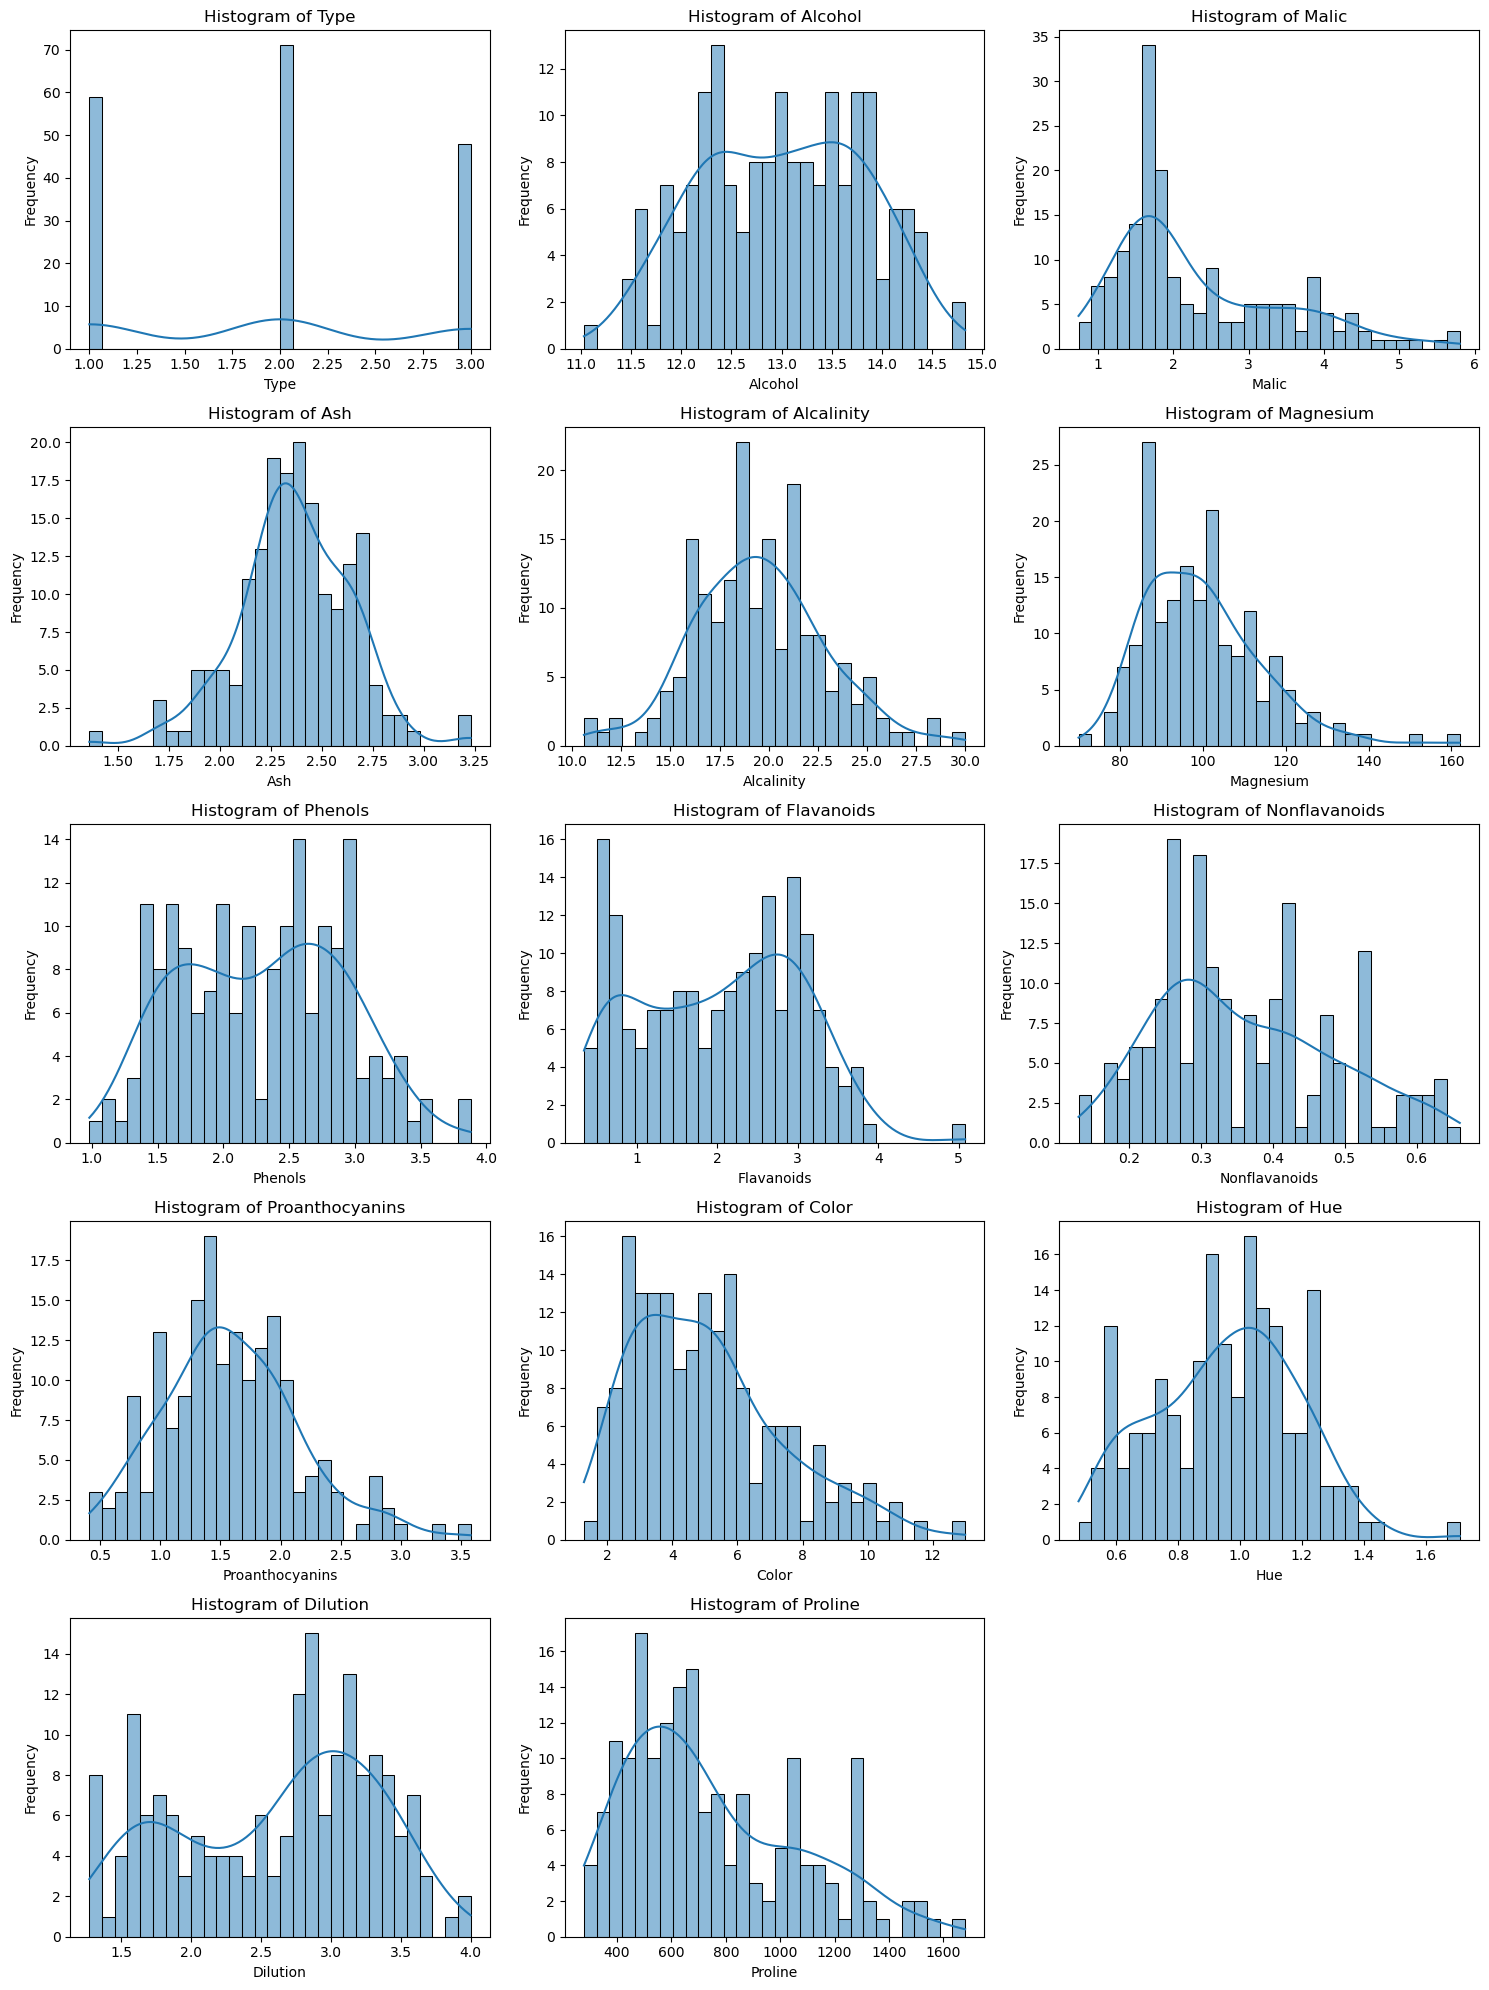

In [53]:

## Number of features
num_features = df.shape[1]
num_rows = (num_features + 2) // 3  # Arrange plots in a grid

# Create a figure for histograms
plt.figure(figsize=(15, num_rows * 4))
#plt.figure(figsize=(10, 15))
# Histograms
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

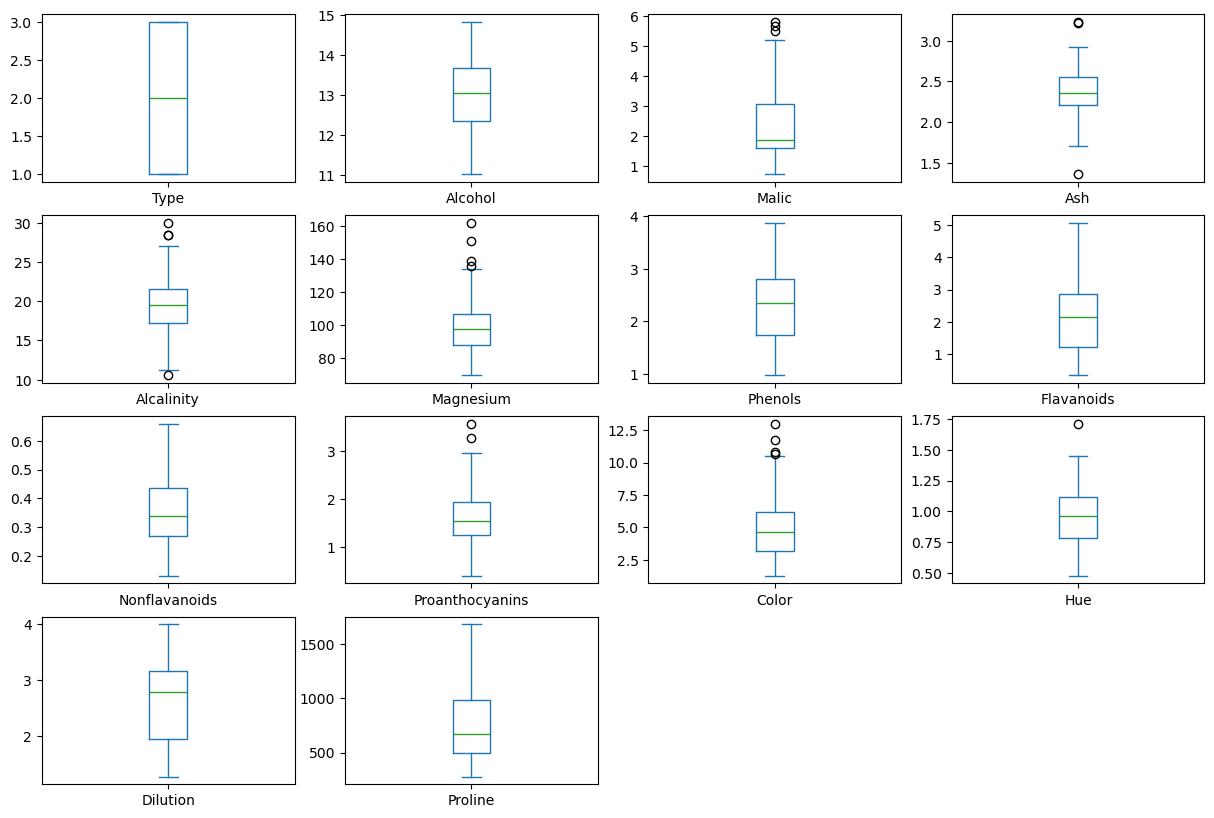

In [71]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(4,4),sharex=True,sharey=False)
plt.show()  

#This argument indicates that the x-axis should not be shared across subplots. Each subplot will have its own x-axis,
#This argument indicates that the y-axis should not be shared across subplots. 

3.	Investigate correlations between features to understand relationships within the data.



In [91]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


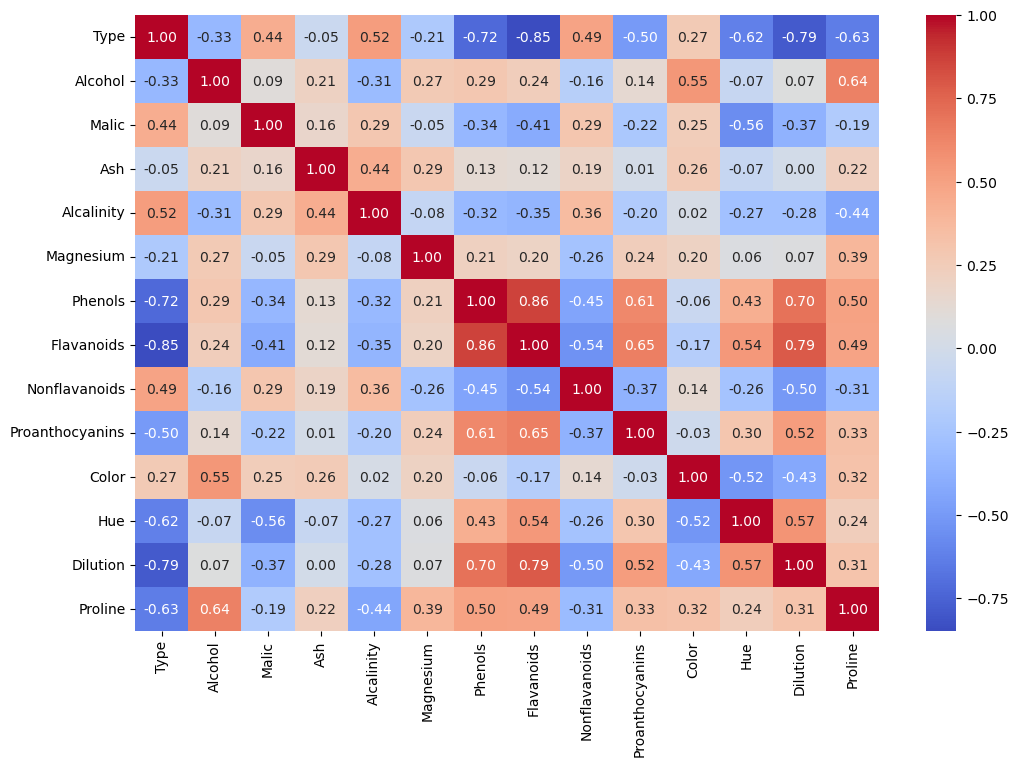

In [113]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.


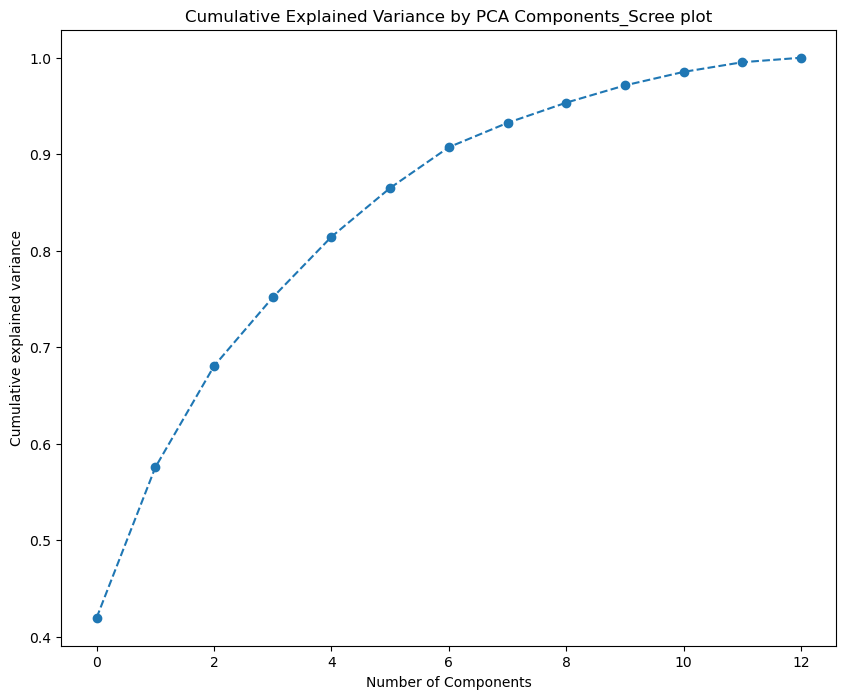

[[-3.31049    -1.20531167]
 [-2.512443    0.667054  ]
 [-2.74230813 -1.49811831]
 [-3.63540255 -2.53920355]
 [-1.35965797 -1.33689884]]


In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#separate features from labels(assuming the first column is labels)
x=df.drop(columns=['Alcohol'])
y=df['Alcohol']

#standardize the data
scaler=StandardScaler() #This class is used to standardize features by removing the mean and scaling to unit variance
x_scaled=scaler.fit_transform(x)

#implement Pca
pca=PCA()
pca.fit(x_scaled)

#plot the explained variance ratio and cumulative explained variance(scree plot)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA Components_Scree plot')
plt.show()

# Transform the data into the PCA space (e.g., reducing to 2 dimensions)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

#show  the transformed data
print(x_pca[:5])

### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


C:\Users\Akshata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


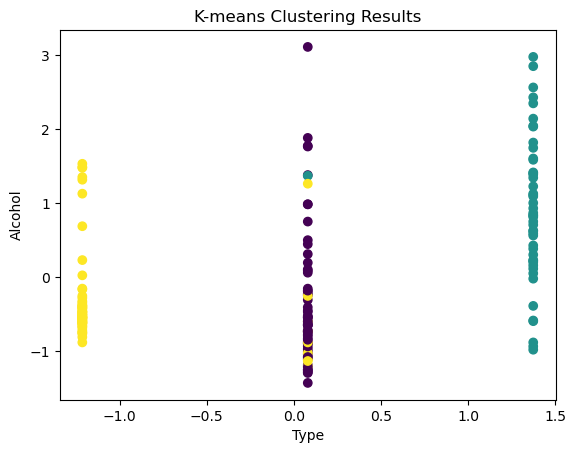

silhouette score for original data:0.28628258889905817


In [149]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#apply k-means clustering to the original scaled dataset
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_scaled)

#cluster labels
cluster_labels=kmeans.labels_

#Add the cluster labels to the original data
df['Cluster_Original']=cluster_labels

# Visualize the clustering results
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=cluster_labels,cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel(df.columns[0])  # Change as per the feature you want to plot
plt.ylabel(df.columns[1])  # Change as per the feature you want to plot
#plt.legend(title='Cluster')
plt.show()

#silhouette score
silhouette_orgl=silhouette_score(x_scaled,cluster_labels)
print(f'silhouette score for original data:{silhouette_orgl}')

### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


C:\Users\Akshata\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


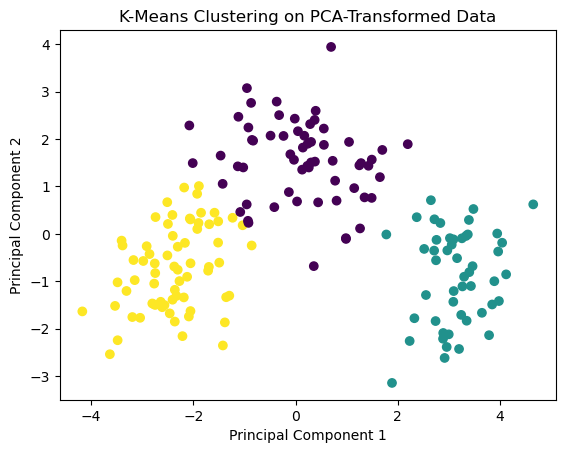

Silhouette Score for PCA Data: 0.5551828206132293


In [158]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(x_pca)

# Get the cluster labels
cluster_labels_pca = kmeans_pca.labels_

# Add the cluster labels to the PCA-transformed data
df['Cluster_PCA'] = cluster_labels_pca

# Scatter plot of PCA components with clusters
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels_pca, cmap='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette Score for PCA Data
silhouette_pca = silhouette_score(x_pca, cluster_labels_pca)
print(f'Silhouette Score for PCA Data: {silhouette_pca}')


### Task 5: Comparison and Analysis:
1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [165]:
print(f'silhouette score for original data:{silhouette_orgl}')
print(f'Silhouette Score for PCA Data: {silhouette_pca}')

silhouette score for original data:0.28628258889905817
Silhouette Score for PCA Data: 0.5551828206132293


### Task 6: Conclusion and Insights
1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


1. PCA helps in reducing dimensionality and may improve clustering performance.
2. Principal Component Analysis (PCA) is a powerful technique used to reduce the dimensionality of large datasets by transforming the data into a new coordinate system
3. The K-means algorithm successfully grouped the data into clusters.
4. Visualizing the clusters using scatter plots provided insight into how data points were grouped, helping to interpret the clustering results.